In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
from source.features_dir import vehicle_data_74t
from source.config import EXTERNAL_DATA_DIR

df = vehicle_data_74t.df_truck_vehicle_data()


2025-03-09 22:02:27.854 | INFO     | source.config:<module>:13 - PROJ_ROOT path is: /home/anders/engasjement_svv


# 11: Har 74 t et høyrere miljøutslipp enn dagens lovelig tonnasje.

In [2]:
df['CO₂ (kg)'] = df['CO₂ (tonn)'] * 1000

df_agg = df.groupby('ekvipasje').agg(**{
    'Sum CO₂ (kg)': ('CO₂ (kg)', 'sum'),
    'Sum Distanse (km)': ('Distanse (km)', 'sum'),
}).reset_index()

df_agg['CO₂ snitt (kg/km)'] = df_agg['Sum CO₂ (kg)'] / df_agg['Sum Distanse (km)']

df_agg.round(2)


,ekvipasje,Sum CO₂ (kg),Sum Distanse (km),CO₂ snitt (kg/km)
0,3-akslet trekkvogn med 4-akslet tilhenger,1744780.0,1335367.0,1.31
1,3-akslet trekkvogn med 5-akslet tilhenger,2855120.0,2155290.0,1.32
2,4-akslet trekkvogn med 4-akslet tilhenger,644360.0,458188.0,1.41
3,4-akslet trekkvogn med 5-akslet tilhenger,1308380.0,875343.0,1.49


# 44: Bruk av tømmervogntog med økt totalvekt vil redusere CO2-utslipp per transportert kubikkmeter tømmer

# + 45: Bruk av tømmervogntog med høyere totalvekt vil redusere de totale klimagassutslippene per transportert enhet av tømmer.

In [3]:
df_weight = pd.read_csv(EXTERNAL_DATA_DIR / 'bil_henger_basevekt.csv').drop(columns=['ekvipasje'])
df = df.merge(right=df_weight, left_on='VIN', right_on='VIN_lastebil', how='inner')
df['timber (kg)'] = df['Max vekt'] - (df['vekt bil (kg)'] + df['vekt henger (kg)'])
df = df[df['timber (kg)'] > 0]

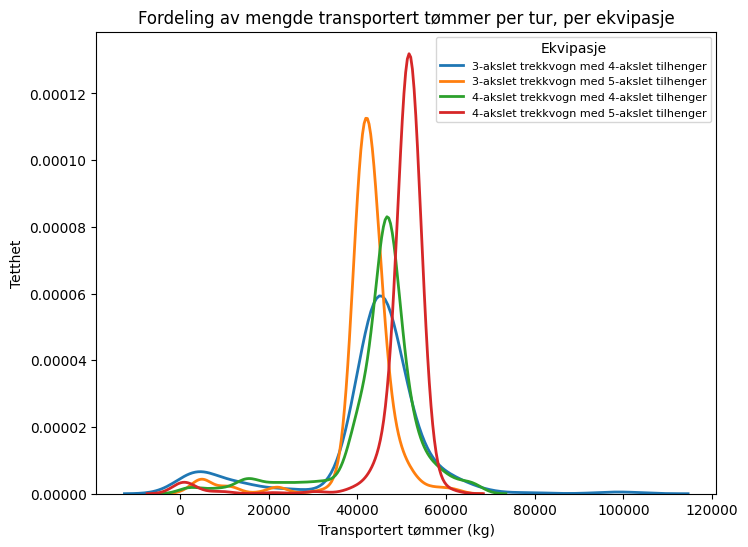

In [4]:
import seaborn as sns

plt.figure(figsize=(8, 6))

for ekvipasje in sorted(df['ekvipasje'].unique()):
    sns.kdeplot(df[df['ekvipasje'] == ekvipasje]['timber (kg)'], label=ekvipasje, linewidth=2)

plt.legend(title="Ekvipasje", fontsize=8)
plt.xlabel("Transportert tømmer (kg)")
plt.ylabel("Tetthet")
plt.title("Fordeling av mengde transportert tømmer per tur, per ekvipasje")
plt.show()

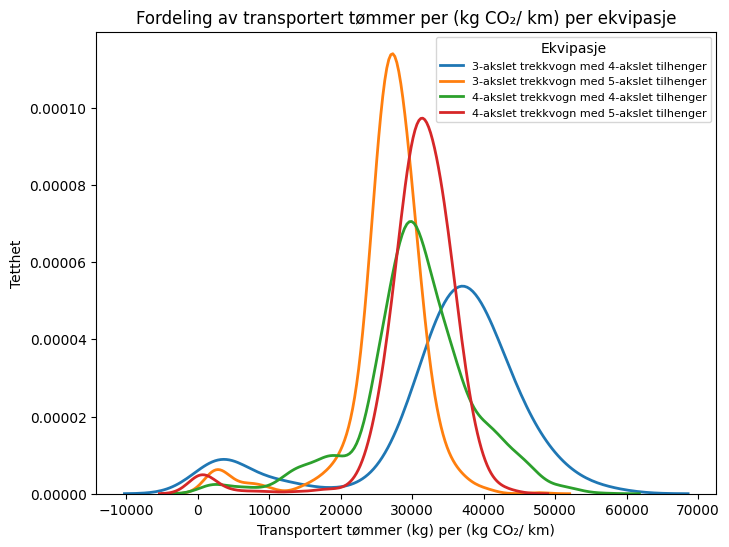

In [5]:
import seaborn as sns

df['timber/CO₂/km'] = df['timber (kg)'] / (df['CO₂ (kg)'] / df['Distanse (km)'])
df = df[(0 <= df['timber/CO₂/km']) & (df['timber/CO₂/km'] <= 60000)]

plt.figure(figsize=(8, 6))
for ekvipasje in sorted(df['ekvipasje'].unique()):
    sns.kdeplot(df[df['ekvipasje'] == ekvipasje]['timber/CO₂/km'], label=ekvipasje, linewidth=2)

plt.legend(title="Ekvipasje", fontsize=8)
plt.xlabel("Transportert tømmer (kg) per (kg CO₂/ km)")
plt.ylabel("Tetthet")
plt.title("Fordeling av transportert tømmer per (kg CO₂/ km) per ekvipasje")
plt.show()

In [6]:
df_agg2 = df.groupby('ekvipasje').agg(**{
    'Snitt transportert tømmer (kg) per (kg CO₂/ km)': ('timber/CO₂/km', 'mean'),
    'Median transportert tømmer (kg) per (kg CO₂/ km)': ('timber/CO₂/km', 'median'),
}).reset_index()

df_agg2.round(2)

,ekvipasje,Snitt transportert tømmer (kg) per (kg CO₂/ km),Median transportert tømmer (kg) per (kg CO₂/ km)
0,3-akslet trekkvogn med 4-akslet tilhenger,34360.26,36565.49
1,3-akslet trekkvogn med 5-akslet tilhenger,26498.63,27200.38
2,4-akslet trekkvogn med 4-akslet tilhenger,30472.16,30409.85
3,4-akslet trekkvogn med 5-akslet tilhenger,30696.02,31457.69
